***Importing Library and Dataset***

In [1]:
import pandas as pd

train_df = pd.read_csv("C:/Users/user/Downloads/archive (14)/train.txt",
                 delimiter=';', header=None, names=['sentence','label'])

test_df = pd.read_csv("C:/Users/user/Downloads/archive (14)/test.txt",
                 delimiter=';', header=None, names=['sentence','label'])

val_df = pd.read_csv("C:/Users/user/Downloads/archive (14)/val.txt",
                 delimiter=';', header=None, names=['sentence','label'])

***Printing top 5 rows of Dataset***

In [2]:
train_df.head(5)

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
test_df.head(5)

,sentence,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [4]:
val_df.head(5)

,sentence,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


***Printing Shape of Dataset***

In [5]:
train_df.shape

(16000, 2)

In [6]:
test_df.shape

(2000, 2)

In [7]:
val_df.shape

(2000, 2)

***Checking Distribution of Emotions***

In [8]:
train_df['label'].value_counts()

label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [9]:
test_df['label'].value_counts()

label
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

In [10]:
val_df['label'].value_counts()

label
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64

***EDA***

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  16000 non-null  object
 1   label     16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2000 non-null   object
 1   label     2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [14]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2000 non-null   object
 1   label     2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [17]:
train_df.isnull().sum()

sentence    0
label       0
dtype: int64

In [18]:
test_df.isnull().sum()

sentence    0
label       0
dtype: int64

In [19]:
val_df.isnull().sum()

sentence    0
label       0
dtype: int64

***Renaming Features***

In [20]:
new_column_names = {
    'sentence': 'Text',
    'label': 'Emotions'
}

train_df = train_df.rename(columns=new_column_names)

In [21]:
train_df.head(5)

,Text,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [22]:
new_column_names = {
    'sentence': 'Text',
    'label': 'Emotions'
}

test_df = test_df.rename(columns=new_column_names)
test_df.head(5)

,Text,Emotions
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [23]:
new_column_names = {
    'sentence': 'Text',
    'label': 'Emotions'
}

val_df = val_df.rename(columns=new_column_names)
val_df.head(5)

,Text,Emotions
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


***Adding the new column***

In [26]:
train_df['Emotions_num'] = train_df['Emotions'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise': 5
})

train_df.head(5)

,Text,Emotions,Emotions_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


In [27]:
test_df['Emotions_num'] = test_df['Emotions'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise': 5
})

test_df.head(5)

,Text,Emotions,Emotions_num
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,0
4,i was feeling a little vain when i did this one,sadness,1


In [28]:
val_df['Emotions_num'] = val_df['Emotions'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise': 5
})

val_df.head(5)

,Text,Emotions,Emotions_num
0,im feeling quite sad and sorry for myself but ...,sadness,1
1,i feel like i am still looking at a blank canv...,sadness,1
2,i feel like a faithful servant,love,4
3,i am just feeling cranky and blue,anger,2
4,i can have for a treat or if i am feeling festive,joy,0


***Modelling***

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train_df.Text, 
    train_df.Emotions_num, 
    test_size=0.2,
    random_state=100,
    stratify=train_df.Emotions_num
)

In [34]:
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


***Classification Pipeline to Classify the Data***

* ***Using CountVectorizer with trigrams.***
* ***Using RandomForest as Classifier.***
* ***Print classification report***

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tri_grams', CountVectorizer(ngram_range = (3, 3))),
    ('random_forest', (RandomForestClassifier()))         
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.86      0.55      1072
           1       0.60      0.31      0.40       933
           2       0.45      0.25      0.32       432
           3       0.64      0.20      0.31       387
           4       0.70      0.11      0.19       261
           5       0.47      0.06      0.11       115

    accuracy                           0.45      3200
   macro avg       0.54      0.30      0.31      3200
weighted avg       0.52      0.45      0.40      3200



***Classification Pipeline to Classify the Data***

* ***Using CountVectorizer with both Unigram and Bigrams.***
* ***Using Multinomial Naive Bayes as classifier.***
* ***Print classification report***

In [38]:
from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_bigrams', CountVectorizer(ngram_range = (1, 2))),
     ('Multi NB', MultinomialNB())         
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.97      0.75      1072
           1       0.67      0.90      0.76       933
           2       0.96      0.26      0.41       432
           3       0.89      0.26      0.41       387
           4       0.92      0.09      0.16       261
           5       1.00      0.04      0.08       115

    accuracy                           0.66      3200
   macro avg       0.84      0.42      0.43      3200
weighted avg       0.75      0.66      0.60      3200



***Classification Pipeline to Classify the Data***

* ***Using CountVectorizer with both Unigram and Bigrams.***
* ***Using Random Forest as classifier.***
* ***Print classification report***

In [39]:
clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))), 
    ('random_forest', (RandomForestClassifier()))         
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1072
           1       0.93      0.90      0.91       933
           2       0.92      0.78      0.84       432
           3       0.87      0.76      0.81       387
           4       0.90      0.69      0.78       261
           5       0.86      0.60      0.71       115

    accuracy                           0.86      3200
   macro avg       0.88      0.78      0.82      3200
weighted avg       0.87      0.86      0.86      3200



***Classification Pipeline to Classify the Data***

* ***Using TF-IDF Vectorizer for Pre-processing Text.***
* ***Using Random Forest as classifier.***
* ***Print classification report***

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1072
           1       0.92      0.89      0.90       933
           2       0.93      0.77      0.84       432
           3       0.82      0.76      0.79       387
           4       0.87      0.70      0.78       261
           5       0.80      0.63      0.71       115

    accuracy                           0.86      3200
   macro avg       0.86      0.79      0.82      3200
weighted avg       0.86      0.86      0.85      3200



***Preprocessing***

In [41]:
import spacy

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [43]:
train_df['preprocessed_Text'] = train_df['Text'].apply(preprocess) 

In [44]:
train_df.head(5)

,Text,Emotions,Emotions_num,preprocessed_Text
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy


***Building a model on Preprocessed Text***

In [49]:
x_train, x_test, y_train, y_test = train_test_split(
    train_df.preprocessed_Text, 
    train_df.Emotions_num, 
    test_size=0.2,
    random_state=2022,
    stratify=train_df.Emotions_num
)

***Checking Scores with best Fit Model***

***Classification Pipeline to Classify the Data***

* ***Using CountVectorizer with both Unigram and Bigrams.***
* ***Using Random Forest as classifier.***
* ***Print classification report***

In [50]:

clf = Pipeline([
    ('vectorizer_bi_grams', CountVectorizer(ngram_range = (1, 2))), 
    ('random_forest', (RandomForestClassifier()))         
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1072
           1       0.88      0.92      0.90       933
           2       0.88      0.85      0.86       432
           3       0.87      0.83      0.85       387
           4       0.81      0.79      0.80       261
           5       0.85      0.70      0.77       115

    accuracy                           0.88      3200
   macro avg       0.86      0.83      0.85      3200
weighted avg       0.88      0.88      0.88      3200



***Classification Pipeline to Classify the Data***

* ***Using TF-IDF Vectorizer for Pre-processing Text.***
* ***Using Random Forest as classifier.***
* ***Print classification report***

In [52]:

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()), 
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1072
           1       0.89      0.88      0.89       933
           2       0.86      0.83      0.85       432
           3       0.82      0.81      0.81       387
           4       0.82      0.66      0.73       261
           5       0.78      0.66      0.71       115

    accuracy                           0.85      3200
   macro avg       0.83      0.79      0.81      3200
weighted avg       0.85      0.85      0.85      3200



In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[976,  31,  18,  15,  27,   5],
       [ 53, 825,  23,  17,  10,   5],
       [ 31,  25, 360,  16,   0,   0],
       [ 19,  32,  10, 313,   1,  12],
       [ 75,   5,   6,   2, 173,   0],
       [ 13,   6,   1,  19,   0,  76]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

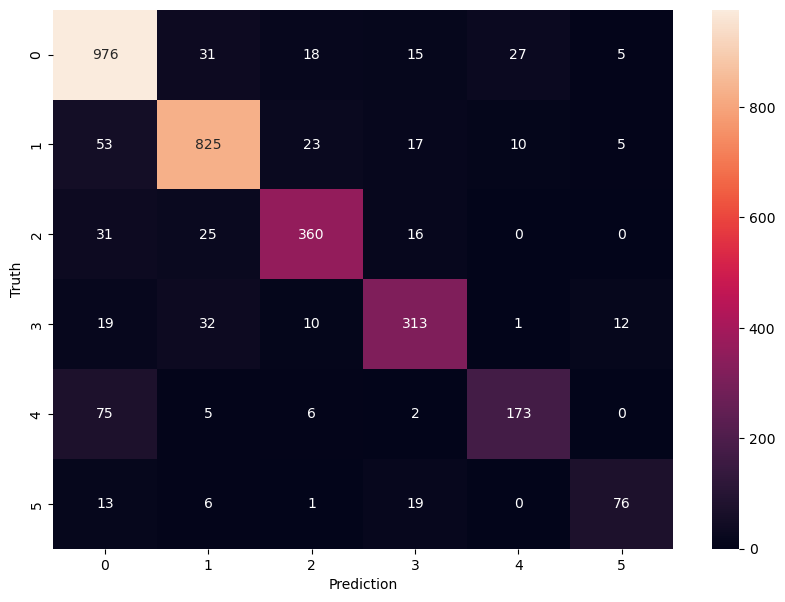

In [54]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')